# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнила студентка гр. 3385 Тараканова Александра Денисовна. Вариант №2.

## Цель работы

 Овладеть навыками работы с математическими пакетами для исследова
ния подгрупп в социальных сетях, а также моделирования, отображения
 и анализа сетей аффилированности.

### Основные определения


#### Двудольные сети

Сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$


#### Гиперграф

Обобщение графа, в котором каждым ребером могут соединяться не два узла, а подмножество

$$
H = H(A, B)$$ где

$A$ - набор вершин

$B$ - набор гипер ребер


#### Проекции двудольной сети

- *Проекция на акторы* ($P_1$): $A_1 = B B^T - D_1$
- *Проекция на события* ($P_2$): $A_2 = B^T B - D_2$

где $D_1$, $D_2$ - диагональные матрицы степеней.


#### K-ядра

$k$-ядро - максимальный подграф, в котором каждый узел смежен не менее чем с k узлами в подграфе:

$$\deg(v) \geq k, ∀ v \in V$$


#### Отношение шансов

Для таблицы сопряженности:

| | Участвует в $j$ | Не участвует в $j$ |
|-|-----------------|-------------------|
| Участвует в $i$ | $a$ | $b$ |
| Не участвует в $i$ | $c$ | $d$ |

$$
OR = \frac{a \cdot d}{b \cdot c}, \quad LOR = \ln(OR)
$$
### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$

### Групповые характеристики сетей

#### Централизация по степени
$$
C_D = \frac{\sum_{i=1}^g [C_D(n^*) - C_D(n_i)]}{(g-1)(g-2)}
$$
где $C_D(n^*)$ - максимальная степень центральности, $g$ - число вершин.

#### Централизация по близости
$$
C_C = \frac{\sum_{i=1}^g [C'_C(n^*) - C'_C(n_i)]}{[(g-2)(g-1)]/(2g-3)}
$$

#### Централизация по посредничеству
$$
C_B = \frac{\sum_{i=1}^g [C'_B(n^*) - C'_B(n_i)]}{g-1}
$$

## Постановка задачи

 С помощью математических пакетов и соответствующих библиотек про
вести анализ заданных социальных сетей на предмет подгрупп. Провести
 исследование сети аффилированности CEO. Полученные результаты со
держательно проинтерпретировать.

## Выполнение работы

установка необходимой библиотеки.

In [14]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

# Подключаем библиотеку для работы с гиперграфами
if (!require(HyperG)) {
  install.packages("HyperG")
  library(HyperG)
}

Loading required package: HyperG

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘HyperG’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘mclust’, ‘proxy’, ‘RSpectra’, ‘gtools’


Loading required package: mclust

Package 'mclust' version 6.1.2
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘HyperG’


The following object is masked from ‘package:network’:

    has.loops


The following objects are masked from ‘package:igraph’:

    is.simple, line.graph




Извлечение социоматрицы и вывод ее на экран.

In [15]:

# Считывание данных
dan <- read.csv("https://drive.google.com/uc?export=download&id=1bzrkkZTQUObWz7nNwHVwvleWXZ-sfo94", skip = 1)

# Создание социоматрицы преобразованием данных в векторы, которые воспринимаются как числа, определяется количество столбцов и строк
sociomatrix <- matrix(as.numeric(unlist(dan[])),
                     nrow = nrow(dan),
                     ncol = ncol(dan))
print(sociomatrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    1     0     0     0     0
 [2,]    0    0    0    0    0    1    1    0    1     0     0     0     0
 [3,]    0    0    0    0    1    0    0    0    1     0     0     0     0
 [4,]    0    0    0    0    0    0    1    0    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     1     0     0
 [6,]    0    1    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    1    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    0    0    0    1    0    0     0     0     0     0
 [9,]    1    1    1    0    0    0    0    0    0     0     0     0     1
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    1    1    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

Отобразить сеть с помощью алгоритма укладки.

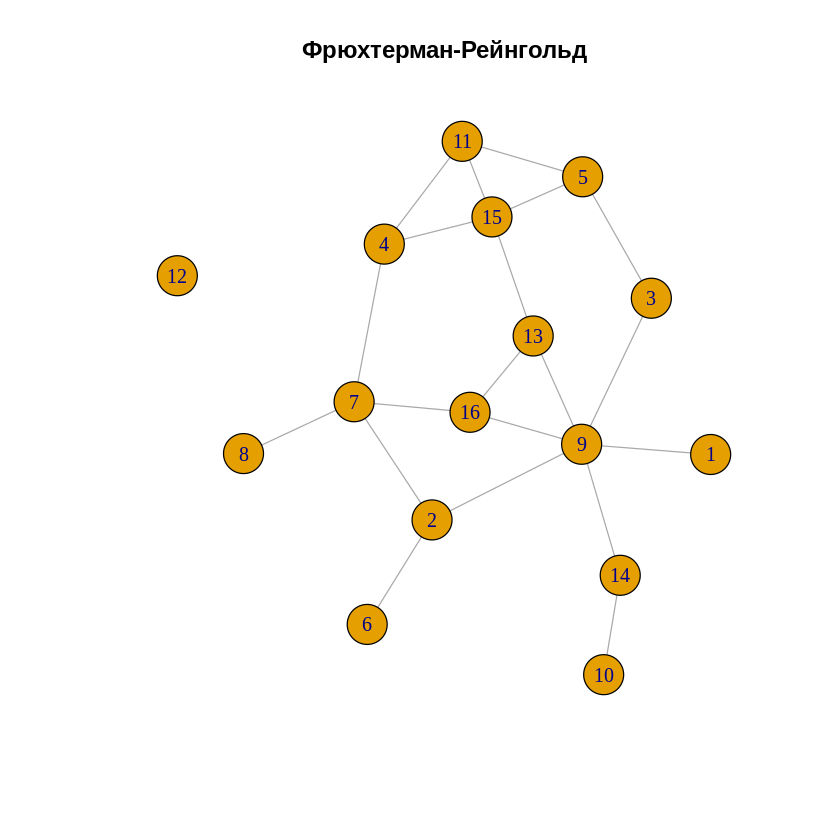

In [28]:
g <- graph_from_adjacency_matrix(sociomatrix, mode = "undirected")#преобразование матрицы в ненаправленный граф
# Алгоритм Фрюхтермана-Рейнгольда (main-заголовок, layout-укладка)
plot(g, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)


Выявить точки сочленения и мосты сети. Подтвердить свои до
гадки с помощью соответствующих функций. Построить графики
 сети, на котором выделены точки сочленения и мосты

Точки сочлинения:2,7,14,9
Мосты: 10-14, 14-9, 1-9, 2-6, 7-8

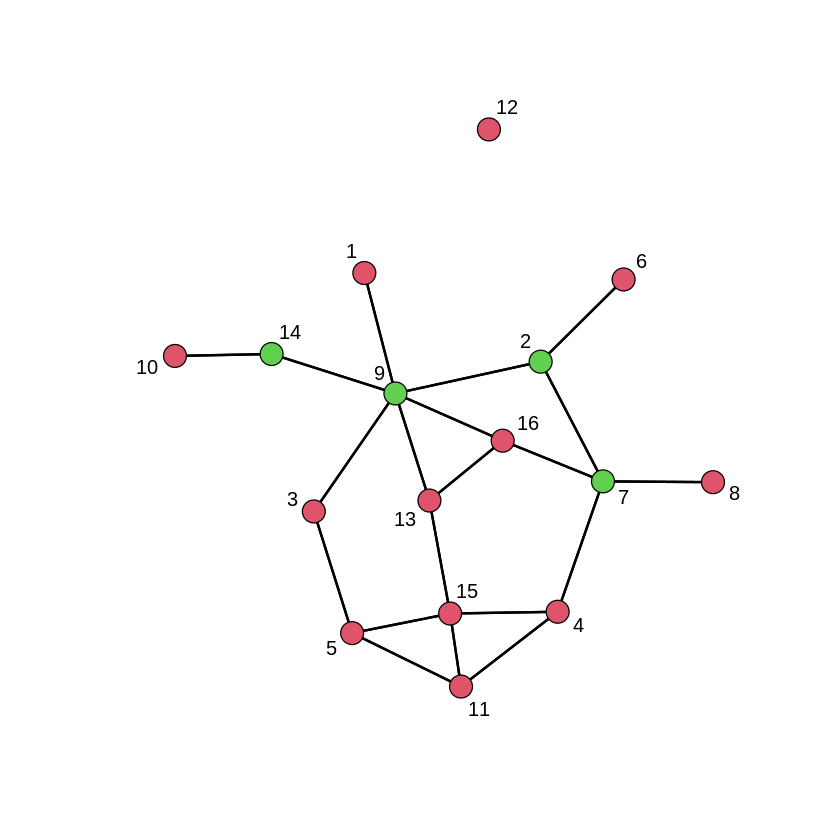

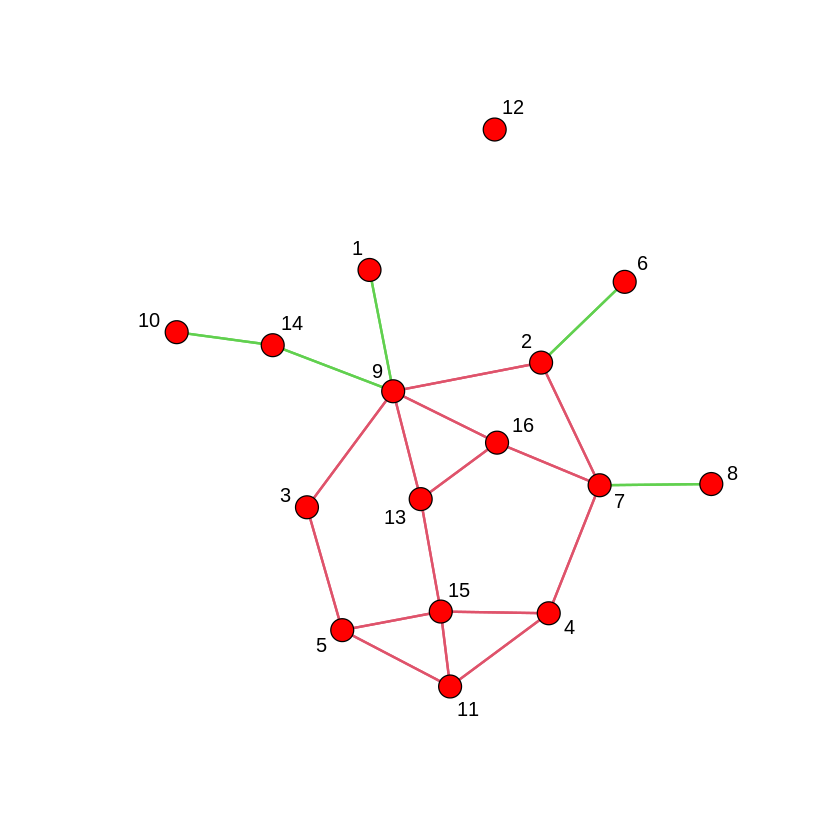

In [29]:
net <- network(sociomatrix, matrix.type = "adjacency")

#точки сочлинения

cpnet <- cutpoints(net,mode="graph", return.indicator=TRUE)
gplot(net,gmode="graph",vertex.col=cpnet+2, jitter=FALSE,displaylabels=TRUE)

# мосты
bridges <- function(dat,mode="graph", connected=c("strong", "weak")) {#создаем функцию
  e_cnt <- network.edgecount(dat)#количество ребер
  if (mode == "graph") {#для неориентированного графа
    cmp_cnt <- components(dat)#количество компонент связности
    b_vec <- rep(FALSE,e_cnt)#вектор из FALSE
    for(i in 1:e_cnt){
      dat2 <- dat#копия
      delete.edges(dat2,i)#удаляем ребро
      b_vec[i] <- (components(dat2) != cmp_cnt)#проверка на изменение компонент связности
    }
  }
  return(b_vec)
}
brnet <- bridges(net)
gplot(net,gmode="graph",vertex.col="red",
      edge.col=brnet+2,
      jitter=FALSE,displaylabels=TRUE)


результат функция совпадает с визуальной оценкой.

Вычислитьзначение централизации для каждой меры. Сделать вы
воды.

In [30]:
snet <- asNetwork(g)

# Создаем подграф без изолированных вершин
non_isolated_vertices <- which(degree(snet) > 0)
snet_connected <- get.inducedSubgraph(snet, non_isolated_vertices)

# Вычисляем меры
n <- network.size(snet_connected)
deg <- degree(snet_connected)
closeness_cent <- closeness(snet_connected, gmode = "graph")#считает нормированный вектор
between_cent <- betweenness(snet_connected, gmode = "graph")

# Вычисляем централизацию для каждой меры

cat("Централизация по степени:\n")
C_D <- sum(max(deg) - deg) / ((n - 1) * (n - 2))
cat("C_D =", C_D, "\n")

cat("Централизация по близости:\n")
C_С <- sum(max(closeness_cent) - closeness_cent) * (2*n - 3) / ((n - 1) * (n - 2))
cat("C_С =", C_С, "\n")

cat("Централизация по посреднечиству:\n")
C_B <- sum(max(between_cent) - between_cent) * 2 / ((n - 1) * (n - 1) * ( n- 2))
cat("C_B =", C_B, "\n")


Централизация по степени:
C_D = 0.5494505 
Централизация по близости:
C_С = 0.3224523 
Централизация по посреднечиству:
C_B = 0.4368132 


централизация по степени близка к 0.5, что дает понять, что сеть относительно равномерна, т.е. нет одной вершины, которая будет соединена со всеми или большого количества ,,оторванных,, вершин.

относительно низкая цнтрализация по близости показывает, что у сети нет как такового центра, из которого можно было бы быстро добраться до любой вершины.

централизация по посредничеству также близка к 0.5, из чего можно сделать вывод, что многие узлы лежат на пути к другим, но нет одного основного посредника.

Исследовать данную сеть на предмет подгрупп с помощью k-ядер.
 Указать какие подгруппы получились. Сделать выводы.

In [31]:
class(g)

[1] "igraph"

core_values
 0  1  2 
 1  5 10 

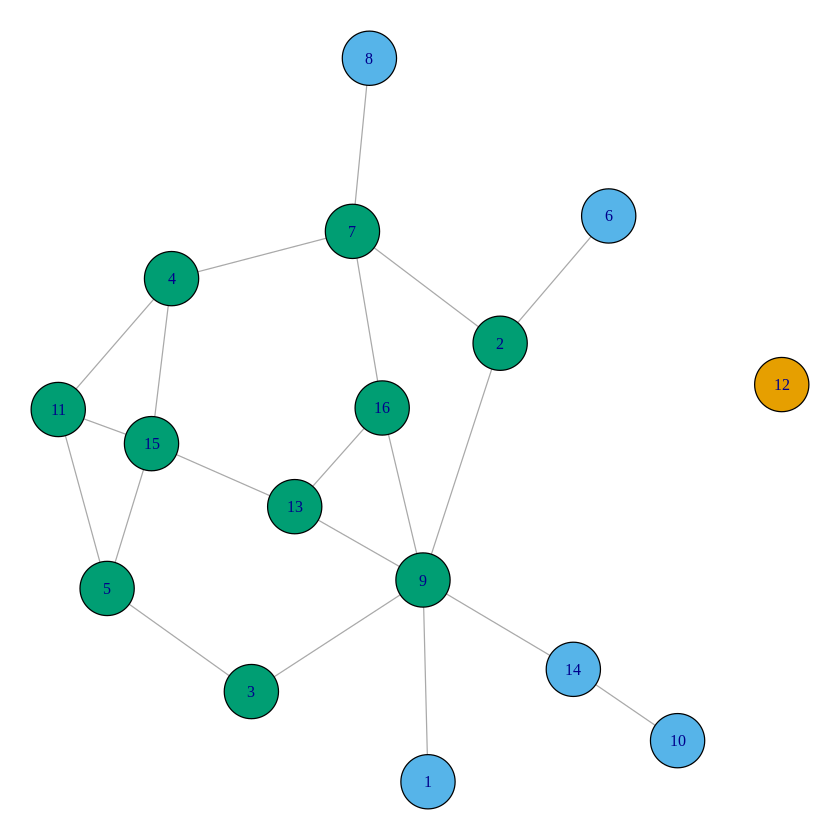

In [36]:
# Вычисляем k-core
core_values <- coreness(g)

# Выводим сводку k-ядер и вершин
table(core_values)

inet1 <- set_vertex_attr(g, name = "color", value = core_values + 1)

# Визуализация графа с раскраской вершин для каждого k
vis <- par(mar = rep(0, 4))
plot(inet1,vertex.label.cex=0.8)
par(vis)

наглядно видно, что 12 вершина относится только к 0-ядру, что логично, так как она не имеет связей с остальными вершинами.

все листья относятся к 1-ядру, но не относятся к 2-ядру, что показывает их ,,независимость,,.

остальные же вершины являются 2-ядром, что говорит об их связности, но не сильной насыщенности этими самыми связями.

 С помощью библиотеки igraph исследовать алгоритмы обнаруже
ния сообществ в зависимости от номера варианта:

 (1) Edge-betweenness, Leading eigenvector, Fast-greedy;

 (2) Spinglass, Walktrap, Label propagation;

 (3) InfoMAP, Louvain, Optimal.

 Кратко объяснить суть каждого алгоритма. Вывести значение мо
дулярности и отобразить полученные сообщества. Сделать выводы.

выполнен третий вариант

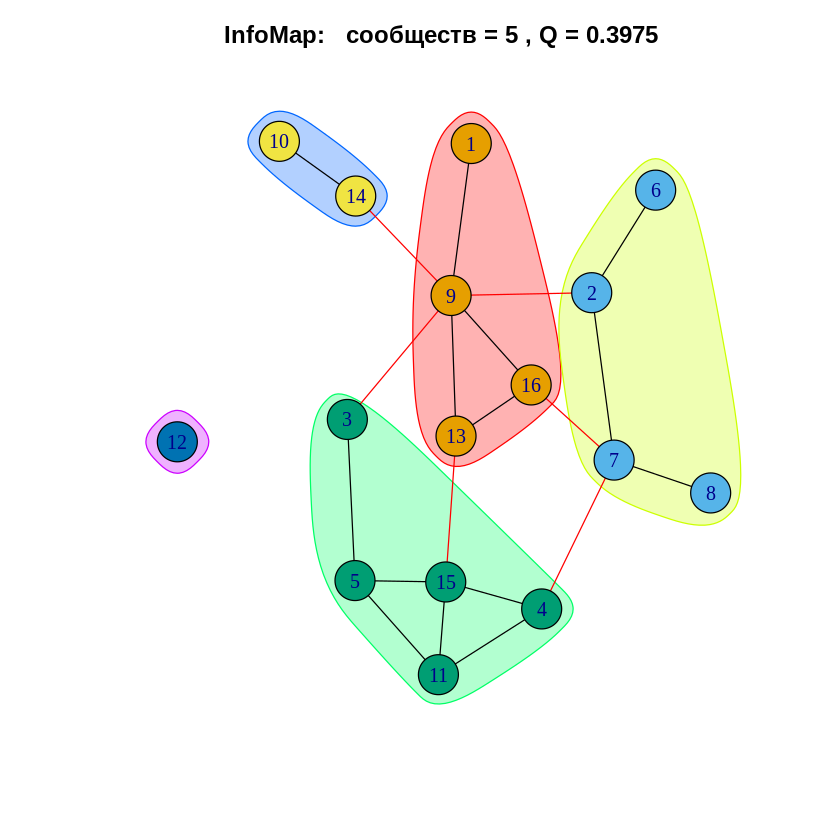

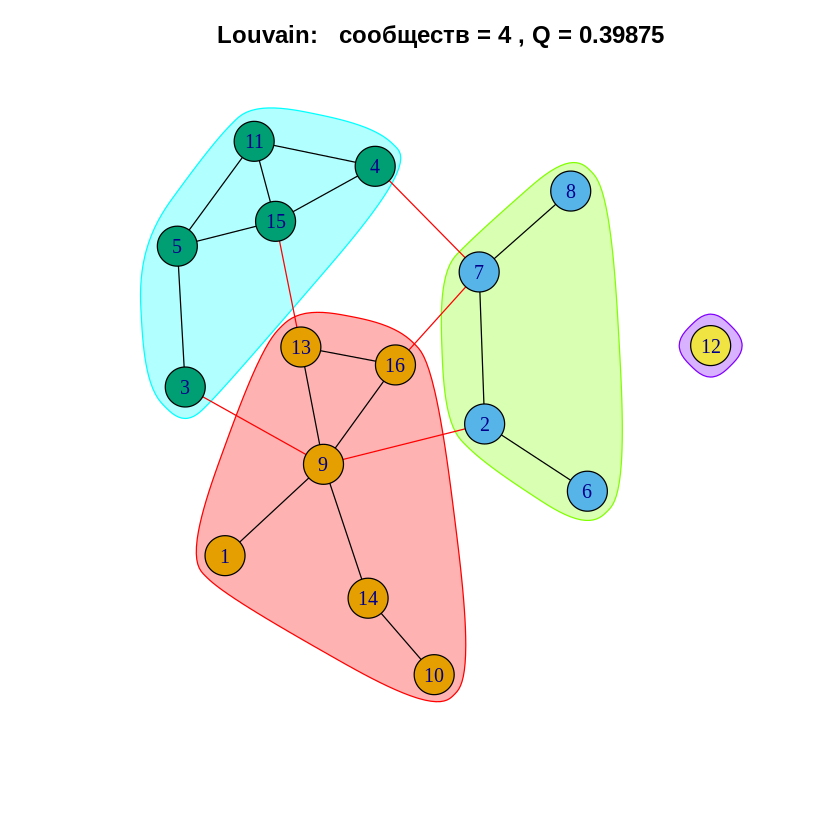

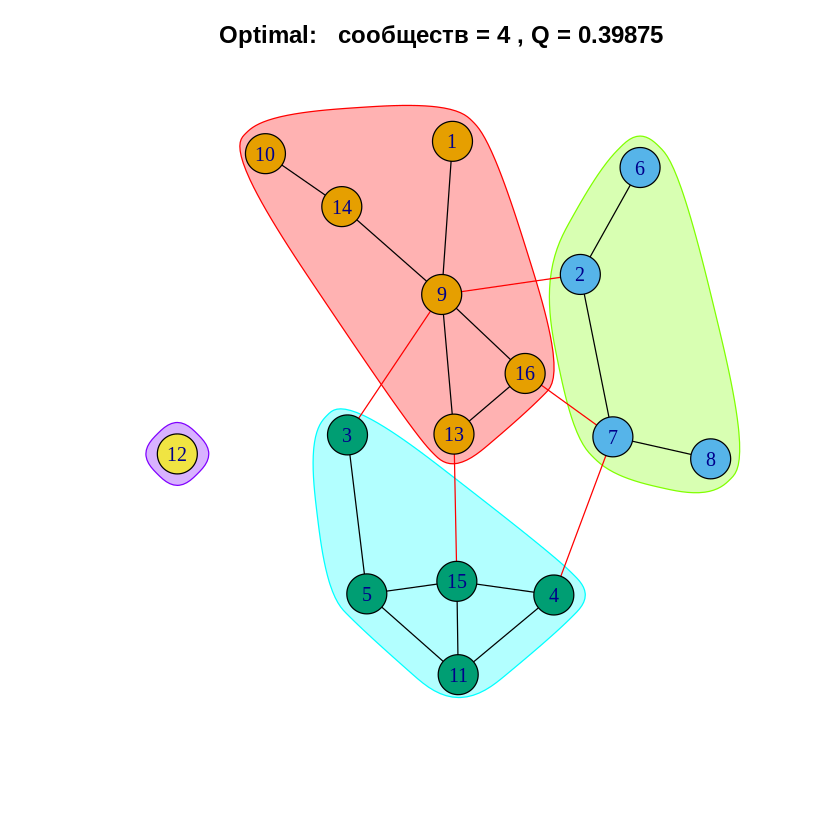

In [37]:
# Вычисление модулярностей
infomap <- cluster_infomap(inet1)
louvain <- cluster_louvain(inet1)
optimal <- cluster_optimal(inet1)

# Вывод количества сообществ и модулярности
ic_str <- paste("InfoMap:   сообществ =", length(infomap), ", Q =", modularity(infomap), "\n")
lc_str <- paste("Louvain:   сообществ =", length(louvain), ", Q =", modularity(louvain), "\n")
oc_str <- paste("Optimal:   сообществ =", length(optimal), ", Q =", modularity(optimal), "\n")
plot(infomap, inet1, main = ic_str)
plot(louvain, inet1, main = lc_str)
plot(optimal, inet1, main = oc_str)

InfoMAP основан на информационной теории — минимизирует длину описания случайного блуждания по графу. Не максимизирует модулярность, а оптимизирует информацию о перемещениях. Часто находит иерархические или перекрывающиеся сообщества.

Louvain - жадный алгоритм, который максимизирует модулярность локально, объединяя вершины/сообщества шаг за шагом. Очень быстрый, масштабируемый.
Работает итеративно: сначала группирует вершины, потом считает новые сообщества как "супервершины", и повторяет.Чувствителен к начальному порядку — может давать разные результаты при разных запусках.

Optimal пытается найти точное решение задачи максимизации модулярности — перебирает все возможные разбиения (или использует точные методы).В реальности для больших графов не используется — слишком медленный. На маленьких графах находит глобальный максимум Q.

первый алгоритм отделил пару 10-14 в отдельное сообщество, возможно потому что они слабо связанны с остальной сетью. второй и третий алгоритм показали одинаковое значение модулярности, первый же значение меньше, но он и не пытается увеличить модулярность.

 Из файла ceo.csv извлечь матрицу инцидентности с помощью со
ответствующих функций. Отобразить полученную матрицу

In [39]:
# Создание матрицы из данных
data <- c(0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)

# Создание матрицы 15x26
sociomatrix2 <- matrix(data, nrow = 26, ncol = 15, byrow = TRUE)

print(sociomatrix2)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    1    1    0    0    0    0    1     0     0     0     0
 [2,]    0    0    1    0    1    0    1    0    0     0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     1     0
 [4,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     0     0     1
 [6,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    1    1    0    0    0    0    0     1     1     0     0
 [8,]    0    0    0    1    0    0    1    0    0     1     0     0     0
 [9,]    1    0    0    1    0    0    0    1    0     1     0     0     0
[10,]    0    0    1    0    0    0    0    0    1     0     0     0     0
[11,]    0    1    1    0    0    0    0    0    1     0     0     0     0
[12,]    0    0    0    1    0    0    1    0    0     0     0     0     0
[13,]    0    0    1    1

Отобразить сеть в виде биграфа.

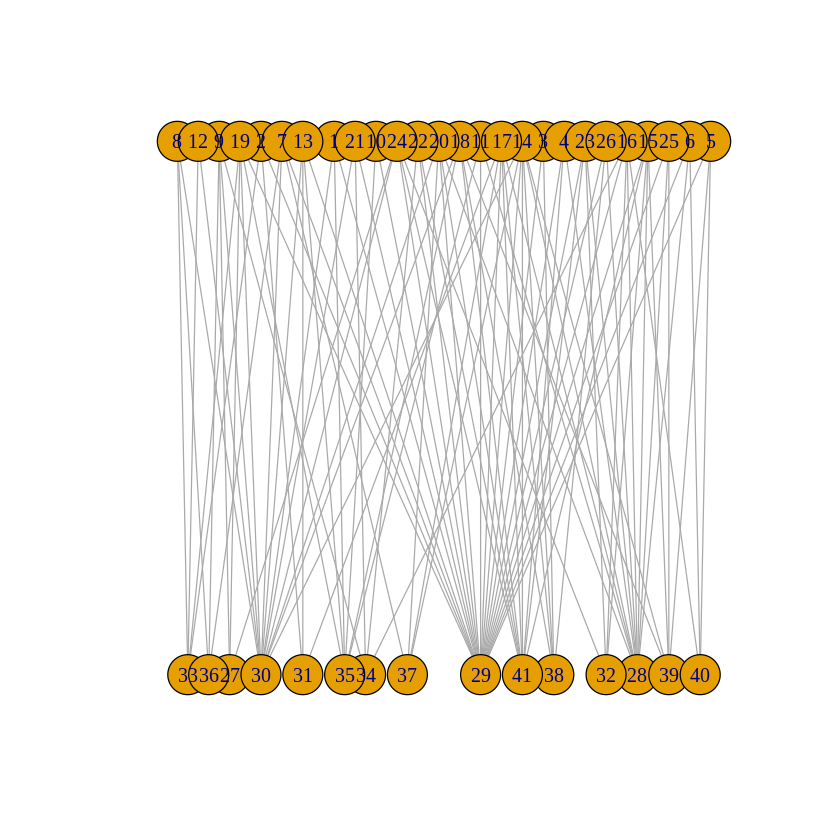

In [41]:
# Построение биграфа по социоматрице
inet2 <- graph_from_biadjacency_matrix(sociomatrix2)

plot(inet2, layout=layout.bipartite)

Отобразить сеть в виде гиперграфа и двойственного гиперграфа

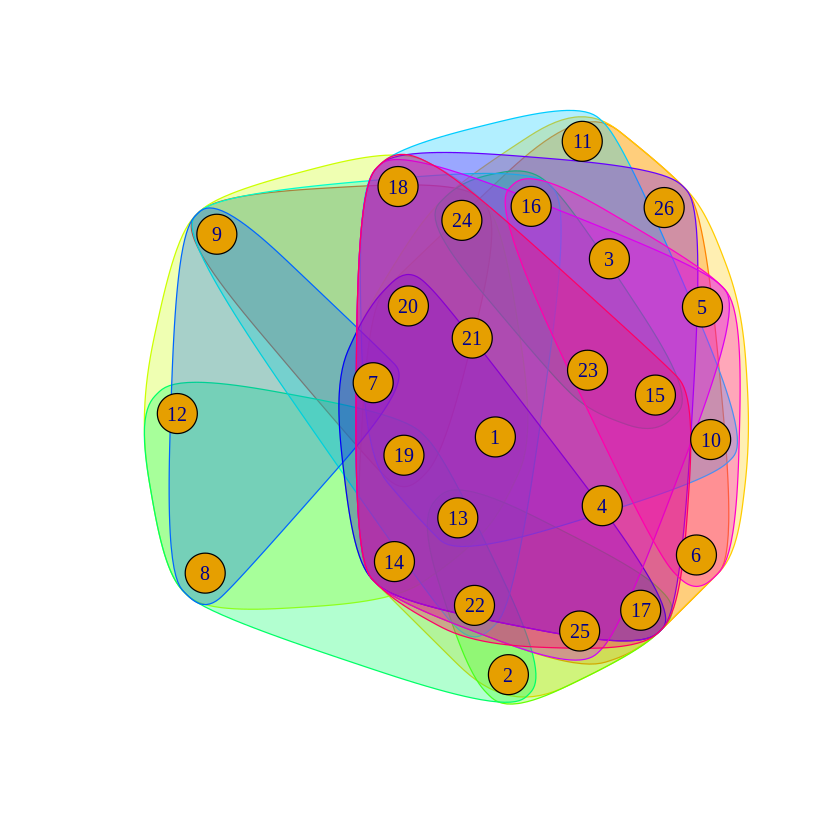

In [42]:
types <- V(inet2)$type #извлекает тип для каждой вершины

# Индексы директоров и клубов
ceo_ids  <- which(!types)
club_ids <- which(types)

# Список смежности по индексам(каждый элемент вектор соседей)
adj_list <- as_adj_list(inet2)


hyperedges <- list()#создает гиперграф
for (i in seq_along(club_ids)) {#для каждого клуба директоров
  club <- club_ids[i]
  neighbors <- adj_list[[club]]  # вектор индексов соседей

  # удаляет соседей- клубы
  ceo_neighbors <- neighbors[neighbors %in% ceo_ids]

  if (length(ceo_neighbors) > 0) {
    # Используем индекс клуба как имя гиперребра
    hyperedges[[as.character(club)]] <- as.character(ceo_neighbors)
  }
}
hnet2 <- as.hypergraph(hyperedges)

plot(hnet2)

каждое цветное поле-клуб

Представить сеть аффилированности в виде двух одномодальных
 сетей: сеть совместного участия акторов и сеть перекрытия собы
тий. Представить полученные сети в виде матриц и взвешенных
 графов. Сделать выводы.

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    1    1    1    1    2    1    1     2     2     1     3
 [2,]    1    0    1    1    1    1    1    1    0     1     1     1     2
 [3,]    1    1    0    1    1    1    1    0    0     1     1     0     1
 [4,]    1    1    1    0    1    2    1    0    0     1     2     0     1
 [5,]    1    1    1    1    0    2    1    0    0     1     1     0     1
 [6,]    1    1    1    2    2    0    1    0    0     1     2     0     1
 [7,]    2    1    1    1    1    1    0    2    2     1     1     1     2
 [8,]    1    1    0    0    0    0    2    0    2     0     0     2     1
 [9,]    1    0    0    0    0    0    2    2    0     0     0     1     1
[10,]    2    1    1    1    1    1    1    0    0     0     2     0     2
[11,]    2    1    1    2    1    2    1    0    0     2     0     0     2
[12,]    1    1    0    0    0    0    1    2    1     0     0     0     1
[13,]    3    2    1    1

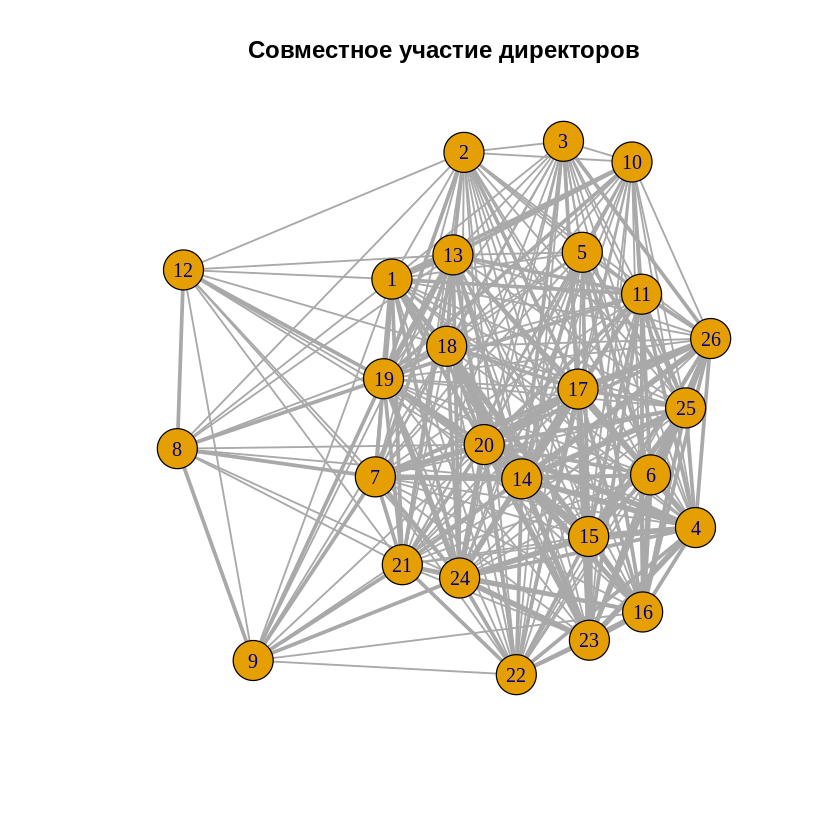

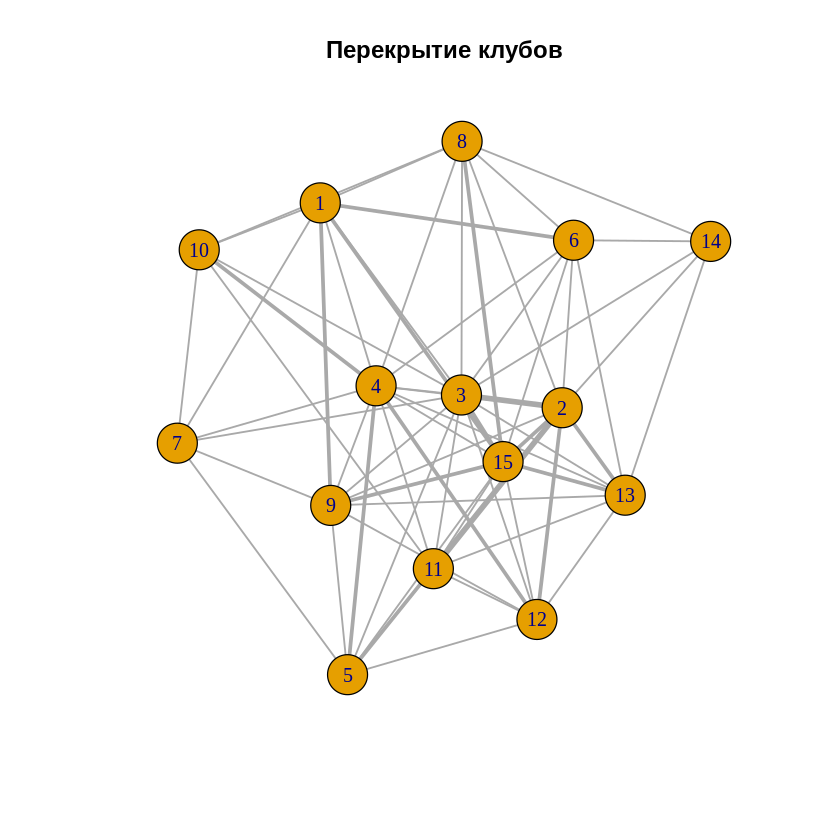

In [47]:
pr <- bipartite_projection(inet2, multiplicity = TRUE)#создает проекцию на два,параметр означает вес=количеству

ceo_net   <- pr$proj1   # сеть совместного участия директооров
club_net  <- pr$proj2   # сеть перекрытия клубов

# Матрица совместного участия директоров
ceo <- as_adjacency_matrix(ceo_net, sparse = FALSE, attr = "weight")

# Матрица перекрытия клубов
club <- as_adjacency_matrix(club_net, sparse = FALSE, attr = "weight")

print(ceo)
print(club)

# Сеть CEO
plot(ceo_net,edge.width = E(ceo_net)$weight * 1.5, main = "Совместное участие директоров")

# Сеть клубов
plot(club_net,edge.width = E(ceo_net)$weight * 1.5,main = "Перекрытие клубов")


по данным графам можно сделать вывод, что нет обособленных директоров или клубов, однако по толщине ребер, которая отображает вес видно, что есть клубы, которые связаны большим количеством директоров.

замечается некоторая группа сильно связанных клубов.

Вычислить степень участия для каждого актора, а также среднее
 количество событий, с которыми актор аффилирован. Сделать вы
воды.

In [48]:
# Вычисление степени участия и среднего значения
participation <- rowSums(sociomatrix2)
mean_participation <- mean(participation)

# Вывод результатов
cat("Степени участия акторов:")
participation
cat("Среднее количество событий на актор")
round(mean_participation, 6)

Степени участия акторов:

[1] 3 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий на актор

[1] 3.769231

видна разрозненность среди участия среди акторов. видно, что среднее значение близко к 4, однако встречаются акторы, учавствующие в 2 событиях и 6-7 событиях.

Вычислить размер и средний размер для каждого события. Сде
лать выводы.

In [49]:
# Вычисление размера и среднего размера
participation <- colSums(sociomatrix2)
mean_participation <- mean(participation)

# Вывод результатов
cat("Размеры событий:")
participation
cat("Среднее количество размера событий:")
round(mean_participation, 4)

Размеры событий:

[1]  3 11 22 12  3  4  4  4  6  3  4  5  5  3  9

Среднее количество размера событий:

[1] 6.5333

события имеют разный размер, что хорошо соотносится с графом. есть событие, которое насчитывает 22 участника, что почти в 4 раза превышает среднее значение.

Вычислить плотность для отношения совместного участия акторов
 и отношения перекрытия. Проинтерпретируйте полученные значе
ния.

In [50]:
density_ceo  <- edge_density(ceo_net)
density_club <- edge_density(club_net)

cat("Плотность сети совместного участия директоров: ", round(density_ceo, 6), "\n")
cat("Плотность сети перекрытия клубов:", round(density_club, 6), "\n")

Плотность сети совместного участия директоров:  0.873846 
Плотность сети перекрытия клубов: 0.628571 


плотности велики, шанс, что хотя бы один директор ходит в два случайных клуба превышает 60%. а в случае директоров близится к 90%.

Определить диаметр сети аффилированности.

In [51]:
cat("Диаметр сети: ", diameter(inet2), "\n")

Диаметр сети:  5 


Для каждых пар событий определить (логарифм) отношение шан
сов. Сделать выводы.

In [52]:
n_ceo <- nrow(sociomatrix2)
n_clubs <- ncol(sociomatrix2)

# Матрица для хранения log(OR)
logOR <- matrix(0, nrow = n_clubs, ncol = n_clubs)

# Перебор всех пар клубов
for (i in 1:(n_clubs - 1)) {
  for (j in (i + 1):n_clubs) {
    a <- sum(sociomatrix2[, i] & sociomatrix2[, j]) + 0.5   # в обоих клубах
    b <- sum(sociomatrix2[, i] & !sociomatrix2[, j]) + 0.5  # только в i
    c <- sum(sociomatrix2[, j] & !sociomatrix2[, i]) + 0.5  # только в j
    d <- sum(!sociomatrix2[, i] & !sociomatrix2[, j]) + 0.5 # ни в одном

    or <- (a * d) / (b * c)
    logOR[i, j] <- logOR[j, i] <- round(log(or), 2)
  }
}
print(logOR)

       [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
 [1,]  0.00 -1.86 -1.26  2.37 -0.18  1.26  1.26  1.26  0.70  1.64 -0.48 -0.73
 [2,] -1.86  0.00  2.20 -1.98 -0.26  1.38 -2.20 -0.67 -1.30 -1.86  1.38  0.80
 [3,] -1.26  2.20  0.00 -2.73  0.48  0.78 -2.10 -0.87 -0.31 -2.66  0.78 -0.57
 [4,]  2.37 -1.98 -2.73  0.00 -0.43 -0.85  1.20  0.17  0.97  2.37  1.20 -0.25
 [5,] -0.18 -0.26  0.48 -0.43  0.00 -0.48  1.26 -0.48  0.70 -0.18  1.26  0.96
 [6,]  1.26  1.38  0.78 -0.85 -0.48  0.00 -0.78  0.87 -1.27 -0.48 -0.78 -1.04
 [7,]  1.26 -2.20 -2.10  1.20  1.26 -0.78  0.00 -0.78  0.31  1.26 -0.78 -1.04
 [8,]  1.26 -0.67 -0.87  0.17 -0.48  0.87 -0.78  0.00 -1.27  1.26 -0.78 -1.04
 [9,]  0.70 -1.30 -0.31  0.97  0.70 -1.27  0.31 -1.27  0.00 -0.96 -1.27  0.00
[10,]  1.64 -1.86 -2.66  2.37 -0.18 -0.48  1.26  1.26 -0.96  0.00  1.26 -0.73
[11,] -0.48  1.38  0.78  1.20  1.26 -0.78 -0.78 -0.78 -1.27  1.26  0.00  1.72
[12,] -0.73  0.80 -0.57 -0.25  0.96 -1.04 -1.04 -1.04  0.00 -0.7

характер матрицы неоднороден. присутствуют как сильные связи так и обособленность, о которой свидетельствует наличие отрицательных значений.

## Выводы

в ходе работы были изучены способы поиска мостов и точек сочлинения. наглядно была видна их связь.

изучены несколько алгоритмов обнаружения сообществ в сетях. было интересно, что они приследуют разные цели, но могут получать относительно близкие результаты.

была рассмотрена сеть аффилированности директоров и клубов, в которые они входят.

интересным и зрелищным результатом оказался гиперграф хотя и не очень информативным.

куда большей информативностью обладают сети перекрытия, из которых более наглядно виден характер отношений между кластерами.

но самым наглядными показателями оказались степень участия и среднее значение.

вновь была проблема с извлечением социоматрицы из файла, но в этот раз решилась она быстрее копированием данных напрямую из файла.

достаточно интересно было проводить аналогии между числовыми показателями и визуализацией при помощи графа, когда эти аналогии явно видны смысл теоретических показателей становится более понятным и применимым.